In [1]:
import numpy as np
import DDM_util as util
import matplotlib.pyplot as plt
import networkx as nx
from IPython import display
%matplotlib inline

In [2]:
num_individuals = 10

In [3]:
sigma_val = 0.003
sigma_val_filename = '003'

In [4]:
def test_twoleader_network(L, graph_name, leader_indices):
    x0 = np.zeros([num_individuals, 1])
    leader_betas = [1, 1]
    beta = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
    sigma = np.ones([num_individuals, 1]) * sigma_val
    dt = 0.001
    T = 10
    plt.figure(0)
    x = util.run_simulation(x0, beta, L, dt, sigma, T, title=r"{0} graph, leaders at indices {1} and {2}, $\beta_{1}=\beta_{2}=1$, $\sigma=%f$".format(graph_name, leader_indices[0], leader_indices[1], sigma_val))
    plt.figure(1)
    util.plot_discrepancy(x, leader_indices, L, T)
    return x

In [5]:
L = util.create_circle_graph(num_individuals)

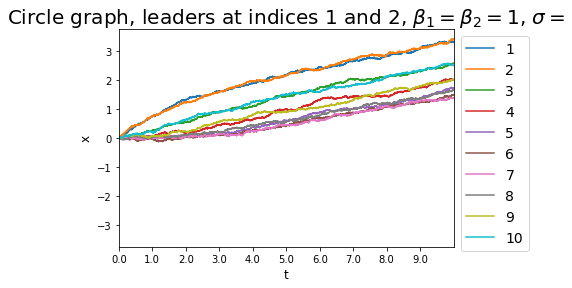

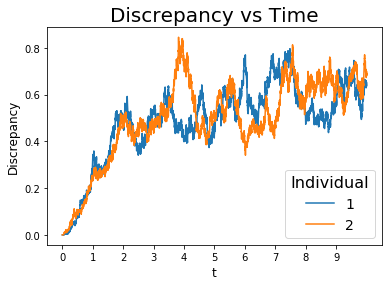

Total final discrepancy: 1.34
Final discrepancy: [ 0.65092893  0.68687613]


In [6]:
x_12 = test_twoleader_network(L, "Circle", [1,2])

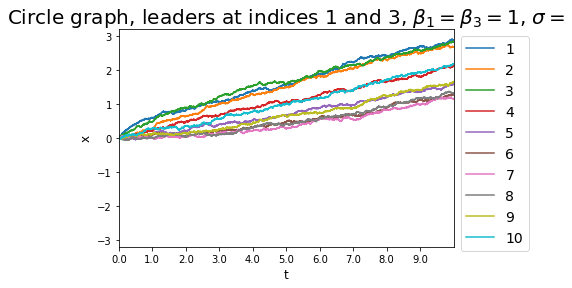

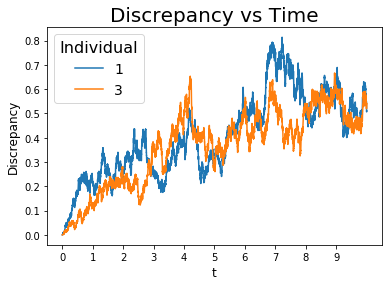

Total final discrepancy: 1.05
Final discrepancy: [ 0.51065835  0.54030795]


In [7]:
x_13 = test_twoleader_network(L, "Circle", [1,3])

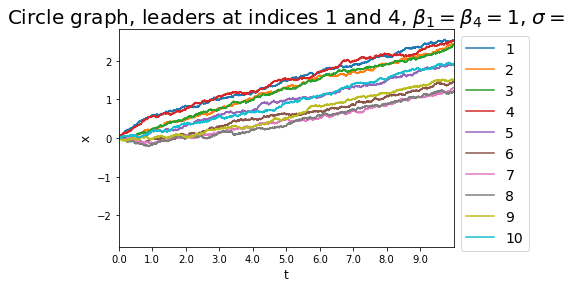

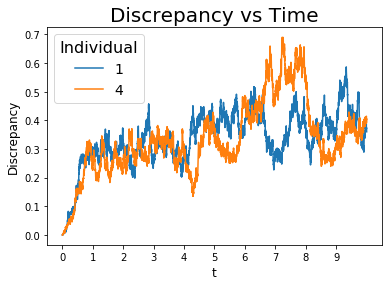

Total final discrepancy: 0.77
Final discrepancy: [ 0.3601842  0.405208 ]


In [8]:
x_14 = test_twoleader_network(L, "Circle", [1,4])

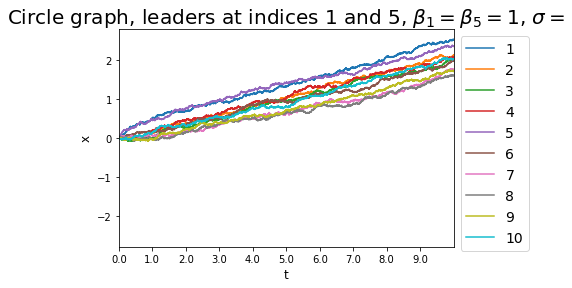

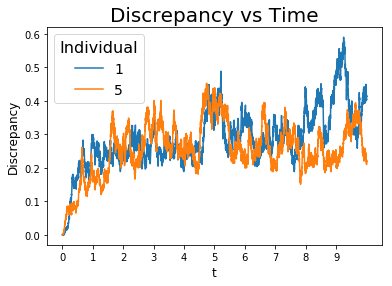

Total final discrepancy: 0.62
Final discrepancy: [ 0.40297736  0.21991134]


In [9]:
x_15 = test_twoleader_network(L, "Circle", [1,5])

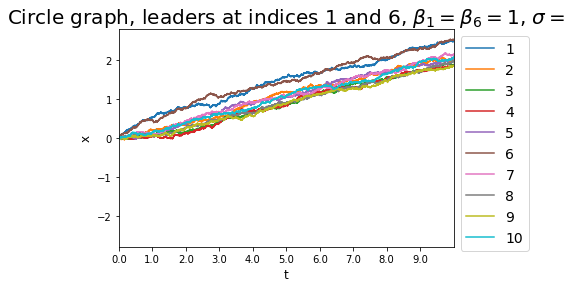

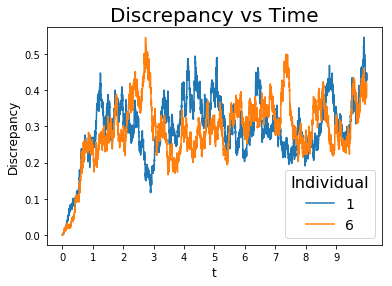

Total final discrepancy: 0.83
Final discrepancy: [ 0.446868    0.38276135]


In [10]:
x_16 = test_twoleader_network(L, "Circle", [1,6])

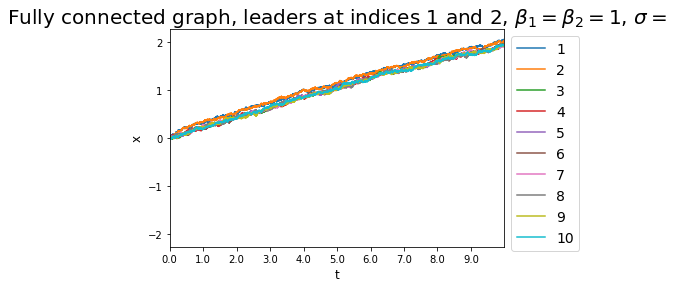

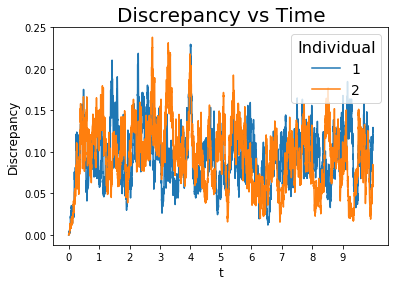

Total final discrepancy: 0.18
Final discrepancy: [ 0.12447233  0.05974247]


In [11]:
L = util.create_fullyconnected_graph(num_individuals)
x_full = test_twoleader_network(L, "Fully connected", [1,2])

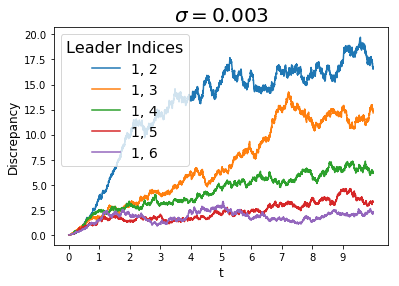

In [12]:
axis_fontsize = 12
title_fontsize = 20
legendtitle_fontsize = 16
legendlabel_fontsize = 14

center = 1
T = 10
dt = 0.001
num_timesteps = int(T/dt)
xtick_spacing = int(num_timesteps / 10)

def plot_x(x, label, L):
    plt.plot([util.compute_discrepancy(x[:,t], center-1, L) for t in range(x.shape[1])], label=label)
plot_x(x_12, "1, 2", L)
plot_x(x_13, "1, 3", L)
plot_x(x_14, "1, 4", L)
plot_x(x_15, "1, 5", L)
plot_x(x_16, "1, 6", L)
legend = plt.legend(title=r"Leader Indices", fontsize=legendlabel_fontsize)
plt.setp(legend.get_title(),fontsize=legendtitle_fontsize)
t_vals = np.arange(0, T, 1)
plt.xticks(range(0, x_12.shape[1], int(x_12.shape[1] / T)), t_vals)
plt.xlabel("t", fontsize=axis_fontsize)
plt.ylabel("Discrepancy", fontsize=axis_fontsize)
plt.title(r"$\sigma=%0.3f$" % sigma_val, fontsize=title_fontsize)
t_vals = np.arange(0, T, xtick_spacing * dt)
plt.savefig("../Figures/twoleader_circlegraph_coverage_noise_sigma%s_connected" % sigma_val_filename, bbox_inches="tight")
plt.show()
